# COVID 19 DATA ANALYSIS PROJECT

In this project we will be analysing the COVID 19 dataset and gaining meaningful insights from the data. The tools that are being used are Python and its libraries, Frontend tools like HTML, CSS, Frontend framework flask, Git and Heroku.  We will be designing a frontend and deployment will be done on Heroku.

Week 1 focuses on Scraping and cleaning the Covid 19 dataset obtained from Worldometer website https://www.worldometers.info/coronavirus.  

Week 2 focuses on data analysis and visualization by performing Exploratory Data Analysis and Feature selection.

In [1]:
#import all the required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
url="https://www.worldometers.info/coronavirus/"

In [3]:
response=requests.get(url)
print (response)

<Response [200]>


In [4]:
soup=BeautifulSoup(response.content, "html.parser")

In [5]:
soup.title

<title>Coronavirus Update (Live): 4,126,639 Cases and 280,974 Deaths from COVID-19 Virus Pandemic - Worldometer</title>

In [6]:
divs=soup.find("div", class_="panel_flip")
for i in divs.find_all("div", class_="panel_front"):
    print(i.text)


2,392,390
Currently Infected Patients


2,344,817 (98%)
in Mild Condition

47,573 (2%)
Serious or Critical


Show Graph



In [7]:
coronatable=soup.find_all("table")   

In [8]:
len(coronatable)

2

In [9]:
co=coronatable[0]

# WORLD DATA

In [10]:
country=[]
total_cases=[]
new_cases=[]
total_deaths=[]
new_deaths=[]
total_recovered=[]
active_cases=[]
serious_cases=[]
total_tests=[]
rows=co.find_all("tr")[9:-1]

for row in rows:
    col=row.find_all("td")
    country.append(col[0].text.strip())
    total_cases.append(col[1].text.strip())
    new_cases.append(col[2].text.strip())
    total_deaths.append(col[3].text.strip())
    new_deaths.append(col[4].text.strip())
    total_recovered.append(col[5].text.strip())
    active_cases.append(col[6].text.strip())
    serious_cases.append(col[7].text.strip())
    total_tests.append(col[10].text.strip())
    
print(country)
print(total_cases)
print(new_cases)
print(total_deaths)
print(new_deaths)
print(total_recovered)
print(active_cases)
print(serious_cases)
print(total_tests)

['USA', 'Spain', 'Italy', 'UK', 'Russia', 'France', 'Germany', 'Brazil', 'Turkey', 'Iran', 'Canada', 'Peru', 'India', 'Belgium', 'Netherlands', 'Saudi Arabia', 'Mexico', 'Switzerland', 'Pakistan', 'Ecuador', 'Portugal', 'Chile', 'Sweden', 'Singapore', 'Belarus', 'Ireland', 'Qatar', 'UAE', 'Israel', 'Austria', 'Poland', 'Japan', 'Romania', 'Ukraine', 'Bangladesh', 'Indonesia', 'S. Korea', 'Philippines', 'Colombia', 'Denmark', 'Serbia', 'Dominican Republic', 'South Africa', 'Egypt', 'Kuwait', 'Panama', 'Norway', 'Czechia', 'Australia', 'Malaysia', 'Morocco', 'Finland', 'Argentina', 'Algeria', 'Kazakhstan', 'Moldova', 'Bahrain', 'Afghanistan', 'Ghana', 'Nigeria', 'Luxembourg', 'Oman', 'Armenia', 'Hungary', 'Thailand', 'Greece', 'Iraq', 'Cameroon', 'Bolivia', 'Azerbaijan', 'Uzbekistan', 'Croatia', 'Bosnia and Herzegovina', 'Guinea', 'Bulgaria', 'Honduras', 'Iceland', 'Cuba', 'Estonia', 'Senegal', 'Ivory Coast', 'North Macedonia', 'New Zealand', 'Lithuania', 'Slovakia', 'Slovenia', 'Djibout

In [11]:
df=pd.DataFrame(list(zip(country, total_cases,new_cases,total_deaths, new_deaths,total_recovered,active_cases,serious_cases,total_tests)), columns=["Country","Total_Cases","New_Cases","Total_Deaths","New_Deaths","Total_Recovered","Active_Cases","Serious_Cases","Total_Tests"])
df

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Cases,Total_Tests
0,USA,"1,347,411",+102,"80,044",+7,"238,080","1,029,287","16,816","8,918,345"
1,Spain,"264,663","+1,880","26,621",+143,"176,439","61,603","1,741","2,467,761"
2,Italy,"218,268",,"30,395",,"103,031","84,842","1,034","2,514,234"
3,UK,"215,260",,"31,587",,N/A,"183,329","1,559","1,728,443"
4,Russia,"209,688","+11,012","1,915",+88,"34,306","173,467","2,300","5,448,463"
...,...,...,...,...,...,...,...,...,...
216,Total:,"298,131",+177,"15,400",+8,"103,623","179,108","10,095",
217,Total:,"659,647","+8,763","21,986",+135,"362,575","275,086","5,002",
218,Total:,"62,558",+573,"2,241",+9,"21,978","38,339",233,
219,Total:,"8,539",+14,118,,"7,630",791,20,


In [12]:
#getting datatypes of all the columns
df.dtypes

Country            object
Total_Cases        object
New_Cases          object
Total_Deaths       object
New_Deaths         object
Total_Recovered    object
Active_Cases       object
Serious_Cases      object
Total_Tests        object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 9 columns):
Country            221 non-null object
Total_Cases        221 non-null object
New_Cases          221 non-null object
Total_Deaths       221 non-null object
New_Deaths         221 non-null object
Total_Recovered    221 non-null object
Active_Cases       221 non-null object
Serious_Cases      221 non-null object
Total_Tests        221 non-null object
dtypes: object(9)
memory usage: 15.7+ KB


In [14]:
#df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.replace(np.nan,0, inplace=True)
df.replace('N/A',np.nan, inplace=True)
df.replace(np.nan,0,inplace=True)
df.head(20)

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Cases,Total_Tests
0,USA,"1,347,411",+102,"80,044",+7,"238,080","1,029,287","16,816","8,918,345"
1,Spain,"264,663","+1,880","26,621",+143,"176,439","61,603","1,741","2,467,761"
2,Italy,"218,268",0,"30,395",0,"103,031","84,842","1,034","2,514,234"
3,UK,"215,260",0,"31,587",0,0,"183,329","1,559","1,728,443"
4,Russia,"209,688","+11,012","1,915",+88,"34,306","173,467","2,300","5,448,463"
5,France,"176,658",0,"26,310",0,"56,038","94,310","2,812","1,384,633"
6,Germany,"171,324",0,"7,549",0,"144,400","19,375","1,650","2,755,770"
7,Brazil,"156,061",0,"10,656",0,"61,685","83,720","8,318","339,552"
8,Turkey,"137,115",0,"3,739",0,"89,480","43,896","1,168","1,334,411"
9,Iran,"107,603","+1,383","6,640",+51,"86,143","14,820","2,675","586,699"


In [15]:
#Removing all + and , and converting into int data type
new_cases1=[]
for i in df["New_Cases"]:
    s=str(i)
    s1=s.replace("+","")
    s2=s1.replace(",","")
    s3=int(s2)
    new_cases1.append(s3)
    
print(new_cases1)

total_cases1=[]
for i in df["Total_Cases"]:
    s=str(i)
    s1=s.replace("+","")
    s2=s1.replace(",","")
    s3=int(s2)
    total_cases1.append(s3)
    
print(total_cases1)

total_deaths1=[]
for i in df["Total_Deaths"]:
    s=str(i)
    s1=s.replace("+","")
    s2=s1.replace(",","")
    s3=int(s2)
    total_deaths1.append(s3)
    
print(total_deaths1)

new_deaths1=[]
for i in df["New_Deaths"]:
    s=str(i)
    s1=s.replace("+","")
    s2=s1.replace(",","")
    s3=int(s2)
    new_deaths1.append(s3)
print(new_deaths1)

total_recovered1=[]
for i in df["Total_Recovered"]:
    s=str(i)
    s1=s.replace("+","")
    s2=s1.replace(",","")
    s3=int(s2)
    total_recovered1.append(s3)
print(total_recovered1)

active_cases1=[]
for i in df["Active_Cases"]:
    s=str(i)
    s1=s.replace("+","")
    s2=s1.replace(",","")
    s3=int(s2)
    active_cases1.append(s3)
print(active_cases1)

serious_cases1=[]
for i in df["Serious_Cases"]:
    s=str(i)
    s1=s.replace("+","")
    s2=s1.replace(",","")
    s3=int(s2)
    serious_cases1.append(s3)
print(serious_cases1)

total_tests1=[]
for i in df["Total_Tests"]:
    s=str(i)
    s1=s.replace("+","")
    s2=s1.replace(",","")
    s3=int(s2)
    total_tests1.append(s3)
print(total_tests1)

[102, 1880, 0, 0, 11012, 0, 0, 0, 0, 1383, 0, 0, 131, 485, 245, 0, 1938, 54, 729, 0, 0, 0, 401, 876, 921, 0, 1189, 781, 4, 38, 170, 0, 231, 522, 887, 387, 34, 184, 0, 110, 0, 0, 0, 0, 1065, 212, 0, 0, 12, 67, 128, 82, 0, 0, 81, 0, 82, 369, 0, 0, 0, 175, 138, 50, 5, 0, 0, 305, 171, 0, 62, 0, 27, 0, 34, 59, 0, 0, 6, 75, 0, 0, 2, 35, 2, 0, 0, 0, 3, 0, 71, 0, 0, 67, 9, 0, 0, 105, 12, 0, 36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 8, 6, 0, 0, 0, 0, 0, 0, 1, 0, 0, 35, 0, 0, 0, 0, 0, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 2491, 16333, 177, 8763, 573, 14, 0]
[1347411, 264663, 218268, 215260, 209688, 176658, 171324, 156061, 137115, 107603, 67702, 65015, 62939, 53081, 42627, 37136, 33460, 30305, 29465, 29071, 27406, 27219, 26322, 23336, 22973, 22760, 22520, 18198, 16458, 15871, 15821, 156

In [16]:
# converting into a dataframe
df=pd.DataFrame(list(zip(country, total_cases1,new_cases1,total_deaths1,new_deaths1,total_recovered1,active_cases1,serious_cases1,total_tests1)), columns=["Country","Total_Cases","New_Cases","Total_Deaths","New_Deaths",'Total_Recovered',"Active_Cases","Serious_Cases","Total_Tests"])
df.head(20)

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Cases,Total_Tests
0,USA,1347411,102,80044,7,238080,1029287,16816,8918345
1,Spain,264663,1880,26621,143,176439,61603,1741,2467761
2,Italy,218268,0,30395,0,103031,84842,1034,2514234
3,UK,215260,0,31587,0,0,183329,1559,1728443
4,Russia,209688,11012,1915,88,34306,173467,2300,5448463
5,France,176658,0,26310,0,56038,94310,2812,1384633
6,Germany,171324,0,7549,0,144400,19375,1650,2755770
7,Brazil,156061,0,10656,0,61685,83720,8318,339552
8,Turkey,137115,0,3739,0,89480,43896,1168,1334411
9,Iran,107603,1383,6640,51,86143,14820,2675,586699


In [17]:
#checking the datatypes if all the columns are converted to int type
df.dtypes

Country            object
Total_Cases         int64
New_Cases           int64
Total_Deaths        int64
New_Deaths          int64
Total_Recovered     int64
Active_Cases        int64
Serious_Cases       int64
Total_Tests         int64
dtype: object

## DATA ANALYSIS AND DATA VISUALIZATION

New_Cases and New_Deaths have 0s in many of their columns so these will be dropped.

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Cases,221.0,37345.149321,180942.171750,1.0,110.0,780.0,6941.0,1622171.0
New_Cases,221.0,256.570136,1467.232438,0.0,0.0,0.0,14.0,16333.0
Total_Deaths,221.0,2542.751131,13573.877037,0.0,2.0,17.0,161.0,152156.0
New_Deaths,221.0,6.787330,35.653828,0.0,0.0,0.0,0.0,391.0
Total_Recovered,221.0,13149.122172,59492.413573,0.0,32.0,298.0,2499.0,655461.0
Active_Cases,221.0,21650.588235,116968.810685,0.0,28.0,316.0,2783.0,1084451.0
Serious_Cases,221.0,430.524887,2129.256395,0.0,0.0,3.0,28.0,17985.0
Total_Tests,221.0,212607.601810,787579.138168,0.0,724.0,12312.0,127769.0,8918345.0


In [19]:
df.isnull().sum()

Country            0
Total_Cases        0
New_Cases          0
Total_Deaths       0
New_Deaths         0
Total_Recovered    0
Active_Cases       0
Serious_Cases      0
Total_Tests        0
dtype: int64

It means that we don't have any columns with null values as all have been now replaced with 0s.

In [20]:
df.columns

Index(['Country', 'Total_Cases', 'New_Cases', 'Total_Deaths', 'New_Deaths',
       'Total_Recovered', 'Active_Cases', 'Serious_Cases', 'Total_Tests'],
      dtype='object')

In [21]:
# Since New_Deaths and New_Cases have many zeroes, these 2 columns are dropped from the dataset.
df = pd.DataFrame(df) 
df.drop(['New_Deaths','New_Cases'], axis=1, inplace = True)

In [22]:
df.head(10)

,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Serious_Cases,Total_Tests
0,USA,1347411,80044,238080,1029287,16816,8918345
1,Spain,264663,26621,176439,61603,1741,2467761
2,Italy,218268,30395,103031,84842,1034,2514234
3,UK,215260,31587,0,183329,1559,1728443
4,Russia,209688,1915,34306,173467,2300,5448463
5,France,176658,26310,56038,94310,2812,1384633
6,Germany,171324,7549,144400,19375,1650,2755770
7,Brazil,156061,10656,61685,83720,8318,339552
8,Turkey,137115,3739,89480,43896,1168,1334411
9,Iran,107603,6640,86143,14820,2675,586699


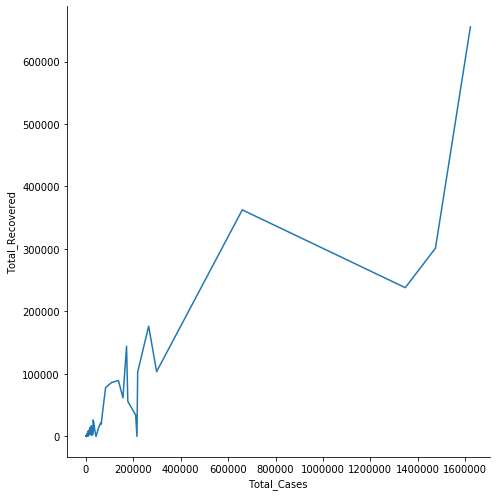

In [23]:
# Look how the relationship between Total_cases and Total_recovered looks like, For most of the cases, with increase in total_cases, 
#Total_recovered is also increasing except for few cases.
sns.relplot(x ="Total_Cases", y="Total_Recovered", kind='line', data=df, height = 7)

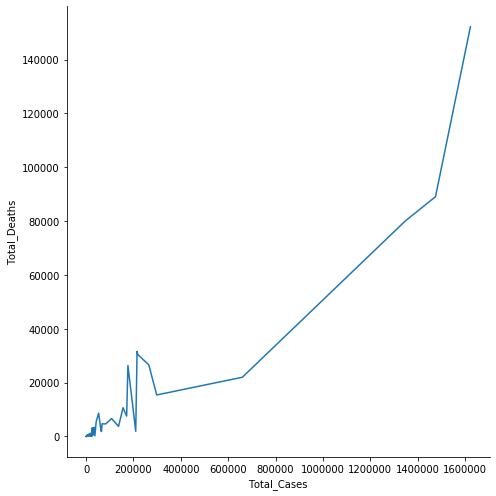

In [24]:
# How the relationship between Total_cases and Total_deaths looks like, For most of the cases, with increase in total_cases, 
#Total_deaths is also increasing except for few cases.
sns.relplot(x ="Total_Cases", y="Total_Deaths", kind='line', data=df, height =7)

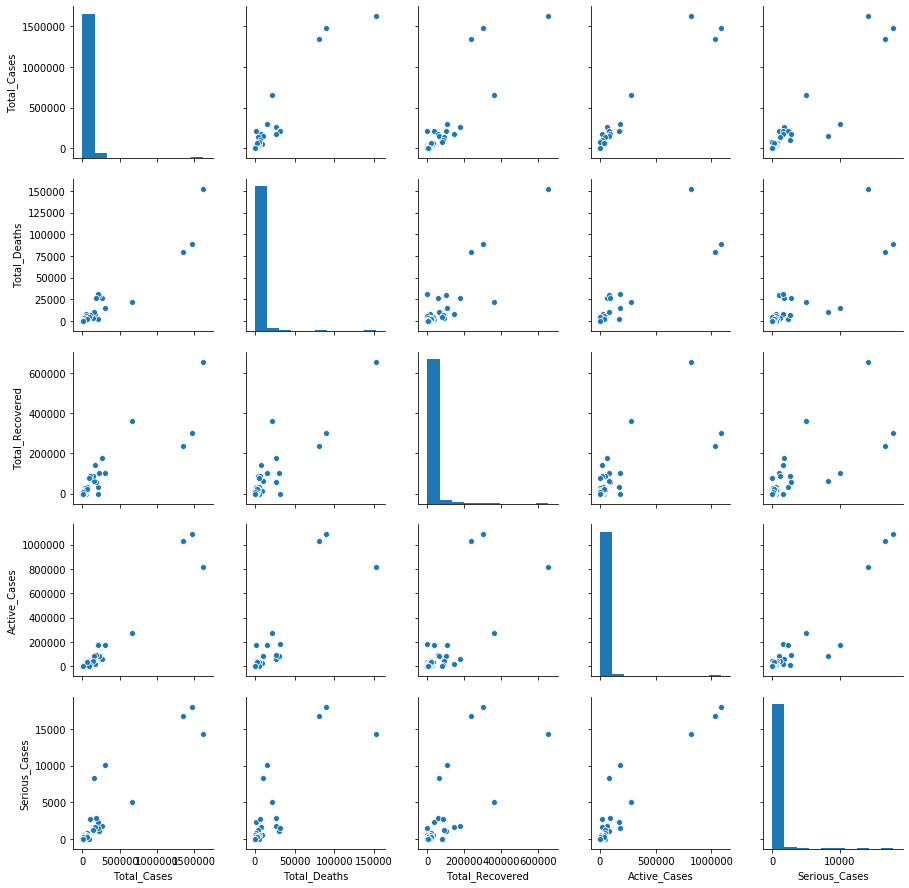

In [25]:
#sns.pairplot(df)
sns.pairplot(df.iloc[:,1:6])

In [26]:
#Find the correlation between different variables
df.corr()

,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Serious_Cases,Total_Tests
Total_Cases,1.000000,0.955268,0.908108,0.974178,0.935550,0.460102
Total_Deaths,0.955268,1.000000,0.905221,0.901241,0.862082,0.379473
Total_Recovered,0.908108,0.905221,1.000000,0.791115,0.795834,0.311743
Active_Cases,0.974178,0.901241,0.791115,1.000000,0.942403,0.509124
Serious_Cases,0.935550,0.862082,0.795834,0.942403,1.000000,0.457055
Total_Tests,0.460102,0.379473,0.311743,0.509124,0.457055,1.000000


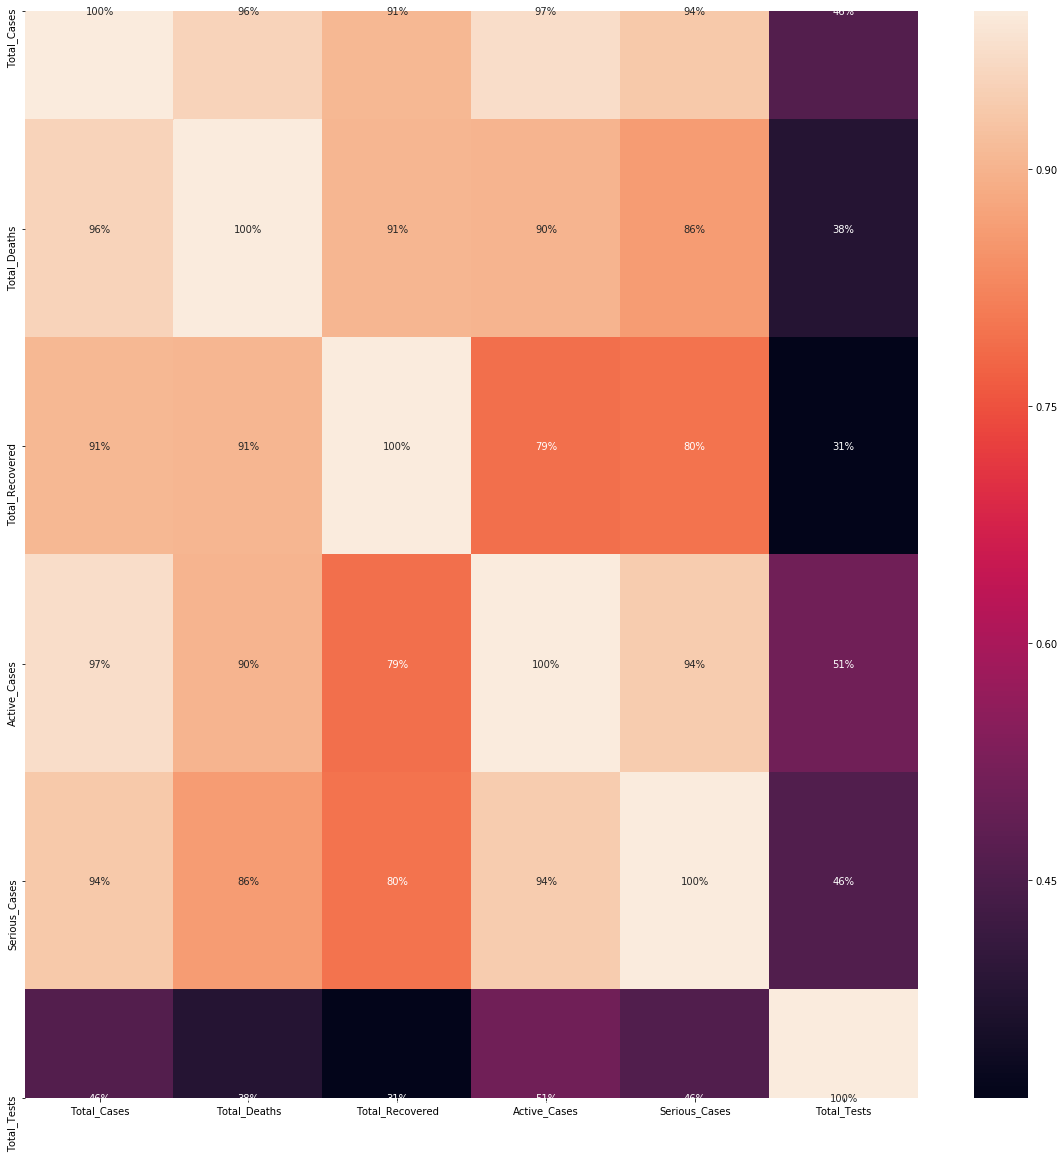

In [27]:
#Get the heatmap for all the variables
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

# INDIAN DATA

In [28]:
url1="https://www.mohfw.gov.in/"

In [29]:
# make a GET request to fetch the raw HTML content
response1=requests.get(url1)
print(response1)

<Response [200]>


In [30]:
# parse the html content
soup1=BeautifulSoup(response1.content, "html.parser")

In [31]:
# just checking the title to confirm we are on the right page
soup1.title

<title>MoHFW | Home</title>

In [32]:
# Extract clean contents and remove any newlines and extra spaces from left and right
clean_contents = lambda row: [x.text.replace('\n', '') for x in row]

In [33]:
# find all table rows and data cells within
stats = [] 
all_rows = soup1.find_all('tr')
for row in all_rows:
    stat = clean_contents(row.find_all('td')) 
    # notice that the data that we require is now a list of length 5
    if len(stat) == 5:
        stats.append(stat)
print(stats)

[['1', 'Andaman and Nicobar Islands', '33', '33', '0'], ['2', 'Andhra Pradesh', '1930', '887', '44'], ['3', 'Arunachal Pradesh', '1', '1', '0'], ['4', 'Assam', '63', '34', '2'], ['5', 'Bihar', '591', '322', '5'], ['6', 'Chandigarh', '169', '24', '2'], ['7', 'Chhattisgarh', '59', '43', '0'], ['8', 'Dadar Nagar Haveli', '1', '0', '0'], ['9', 'Delhi', '6542', '2020', '73'], ['10', 'Goa', '7', '7', '0'], ['11', 'Gujarat', '7796', '2091', '472'], ['12', 'Haryana', '675', '290', '9'], ['13', 'Himachal Pradesh', '50', '38', '2'], ['14', 'Jammu and Kashmir', '836', '368', '9'], ['15', 'Jharkhand', '156', '78', '3'], ['16', 'Karnataka', '794', '386', '30'], ['17', 'Kerala', '505', '485', '4'], ['18', 'Ladakh', '42', '17', '0'], ['19', 'Madhya Pradesh', '3614', '1676', '215'], ['20', 'Maharashtra', '20228', '3800', '779'], ['21', 'Manipur', '2', '2', '0'], ['22', 'Meghalaya', '13', '10', '1'], ['23', 'Mizoram', '1', '1', '0'], ['24', 'Odisha', '294', '63', '2'], ['25', 'Puducherry', '9', '6', '0

In [34]:
#now we will convert the data into a pandas dataframe so that further processing can be done
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data.head()

,Sr.No,States/UT,Confirmed,Recovered,Deceased
0,1,Andaman and Nicobar Islands,33,33,0
1,2,Andhra Pradesh,1930,887,44
2,3,Arunachal Pradesh,1,1,0
3,4,Assam,63,34,2
4,5,Bihar,591,322,5


In [35]:
# Print state_data to see if all the columns are correct and if any null values, nan or missing values are there.
print(state_data)

   Sr.No                    States/UT Confirmed Recovered Deceased
0      1  Andaman and Nicobar Islands        33        33        0
1      2               Andhra Pradesh      1930       887       44
2      3            Arunachal Pradesh         1         1        0
3      4                        Assam        63        34        2
4      5                        Bihar       591       322        5
5      6                   Chandigarh       169        24        2
6      7                 Chhattisgarh        59        43        0
7      8           Dadar Nagar Haveli         1         0        0
8      9                        Delhi      6542      2020       73
9     10                          Goa         7         7        0
10    11                      Gujarat      7796      2091      472
11    12                      Haryana       675       290        9
12    13             Himachal Pradesh        50        38        2
13    14            Jammu and Kashmir       836       368     

In [36]:
#check the datatyes of the columns
state_data.dtypes

Sr.No        object
States/UT    object
Confirmed    object
Recovered    object
Deceased     object
dtype: object

In [37]:
# Before we proceed further, we can see that the state_data has scraped data columns of ‘string’ datatype. 
# We have to convert them into ‘int’ datatype.
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased'] =  state_data['Deceased'].map(int)

state_data.dtypes

Sr.No        object
States/UT    object
Confirmed     int64
Recovered     int64
Deceased      int64
dtype: object

In [38]:
#check if any nulls are there
state_data.isnull().sum()

Sr.No        0
States/UT    0
Confirmed    0
Recovered    0
Deceased     0
dtype: int64

In [39]:
state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
Sr.No        33 non-null object
States/UT    33 non-null object
Confirmed    33 non-null int64
Recovered    33 non-null int64
Deceased     33 non-null int64
dtypes: int64(3), object(2)
memory usage: 1.4+ KB


In [40]:
#dropping Sr.No column as it is just a serial number
state_data = state_data.drop(['Sr.No'],axis=1)

In [41]:
print(state_data)

                      States/UT  Confirmed  Recovered  Deceased
0   Andaman and Nicobar Islands         33         33         0
1                Andhra Pradesh       1930        887        44
2             Arunachal Pradesh          1          1         0
3                         Assam         63         34         2
4                         Bihar        591        322         5
5                    Chandigarh        169         24         2
6                  Chhattisgarh         59         43         0
7            Dadar Nagar Haveli          1          0         0
8                         Delhi       6542       2020        73
9                           Goa          7          7         0
10                      Gujarat       7796       2091       472
11                      Haryana        675        290         9
12             Himachal Pradesh         50         38         2
13            Jammu and Kashmir        836        368         9
14                    Jharkhand        1

In [42]:
#Here we have only 3 columns and all values are significant, hence we are not dropping any columns
state_data.head()

,States/UT,Confirmed,Recovered,Deceased
0,Andaman and Nicobar Islands,33,33,0
1,Andhra Pradesh,1930,887,44
2,Arunachal Pradesh,1,1,0
3,Assam,63,34,2
4,Bihar,591,322,5


## DATA ANALYSIS AND DATA VISUALIZATION

In [43]:
state_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,33.0,1907.242424,3903.272289,1.0,42.0,294.0,1786.0,20228.0
Recovered,33.0,586.606061,905.940255,0.0,17.0,78.0,750.0,3800.0
Deceased,33.0,63.909091,158.035867,0.0,0.0,3.0,44.0,779.0


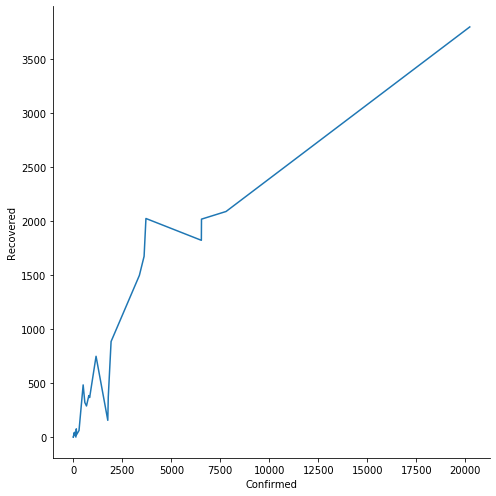

In [44]:
# Look how the relationship between Confirmed cases and Recovered cases look, For most of the cases, with increase in confirmed
#cases, Recovered cases is also increasing except for few cases.
sns.relplot(x ="Confirmed", y="Recovered", kind='line', data=state_data, height =7)

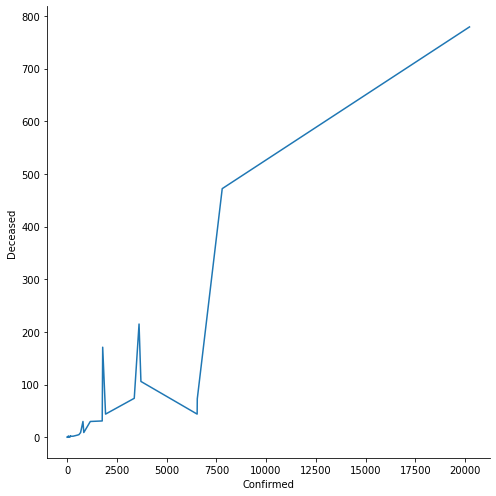

In [45]:
# The relationship between Confirmed and Deceased, For most of the cases, Deceased cases increases with increase in 
#confirmed cases but for some , there is a decrease in deaths in the initial stages. 
sns.relplot(x ="Confirmed", y="Deceased", kind='line', data=state_data, height = 7)

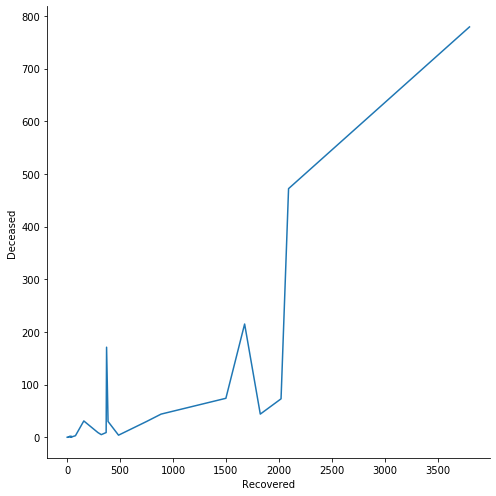

In [46]:
# The relationship between Recovered and Deceased, For most of the cases, Deceased cases steadily increases with increase in 
#Recovered cases but for some , there is a decrease in deaths in the initial stages (between 1200 to 1500).
sns.relplot(x ="Recovered", y="Deceased", kind='line', data=state_data, height = 7)

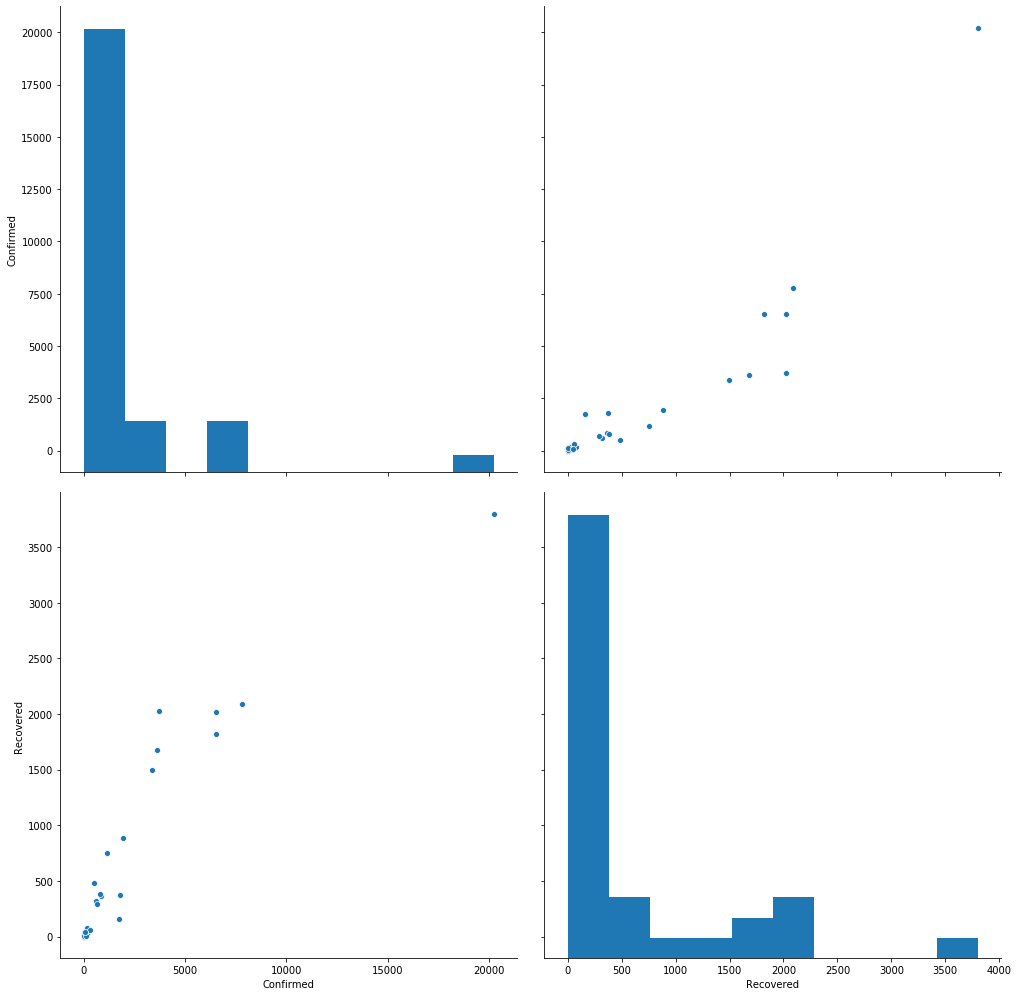

In [47]:
sns.pairplot(state_data.iloc[:,0:3],height=7)

In [48]:
#Correlation between different variables
state_data.corr()

,Confirmed,Recovered,Deceased
Confirmed,1.000000,0.926372,0.918145
Recovered,0.926372,1.000000,0.824059
Deceased,0.918145,0.824059,1.000000


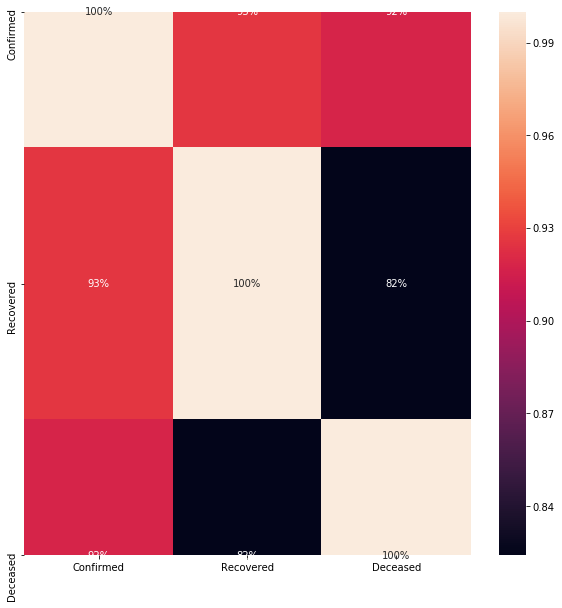

In [49]:
#heatmap between different varialbes to know the correlation between them
plt.figure(figsize=(10,10))  
sns.heatmap(state_data.corr(), annot=True, fmt='.0%')

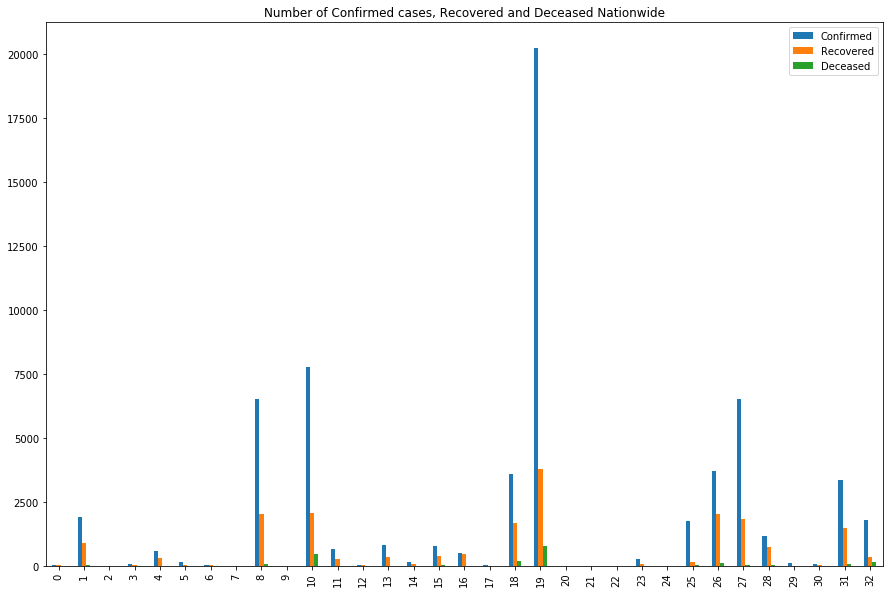

In [50]:
#Bar chart of all the variables
state_data.plot.bar(figsize=(15,10),title="Number of Confirmed cases, Recovered and Deceased Nationwide");

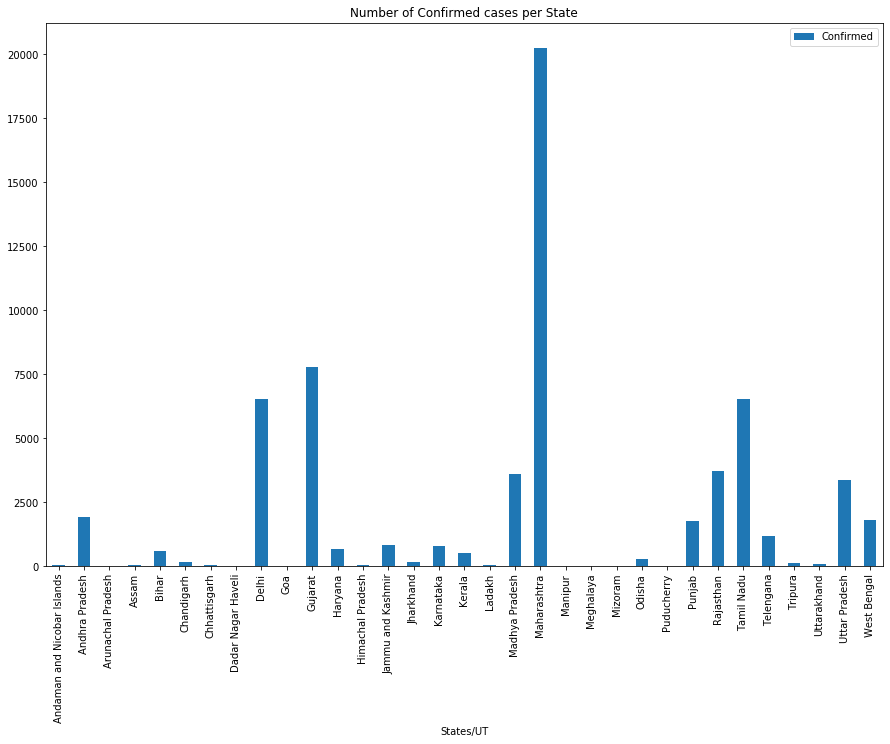

In [51]:
# bar chart showing number of confirmed cases per state
state_data.plot.bar(x="States/UT", y="Confirmed", figsize=(15,10), title="Number of Confirmed cases per State");

plt.show(block=True);

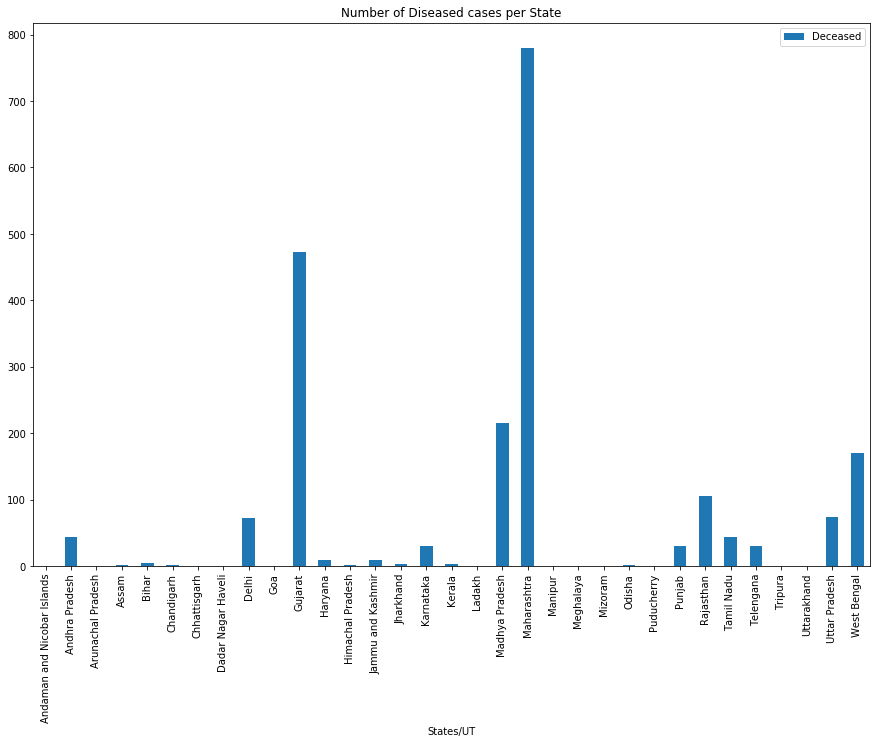

In [52]:
#Bar chart showing number of diseased cases per state
state_data.plot.bar(x="States/UT", y="Deceased", figsize=(15,10),title="Number of Diseased cases per State");

plt.show(block=True);

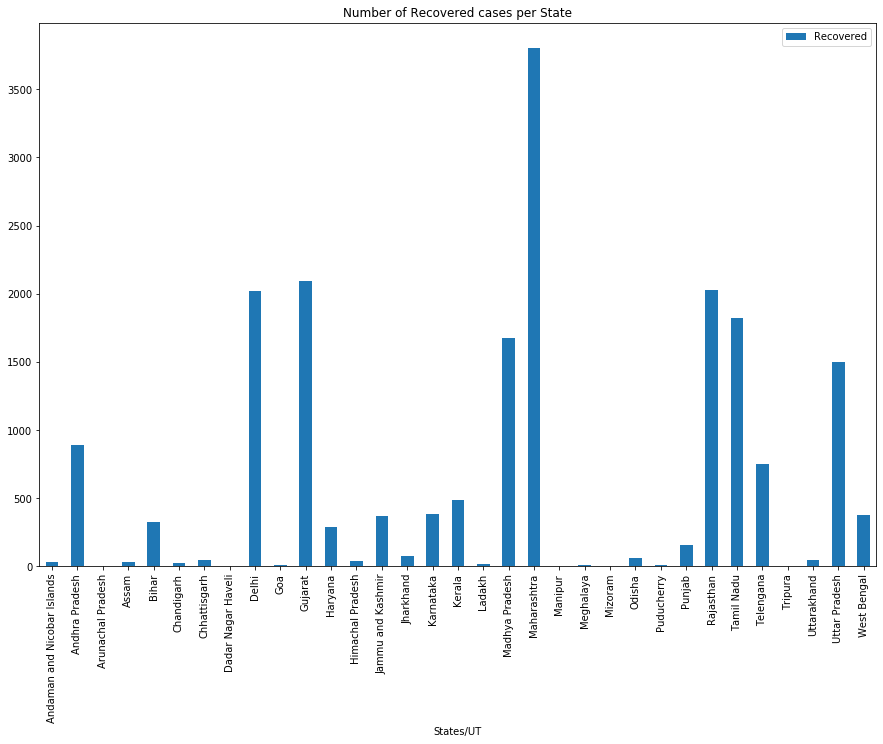

In [53]:
#Bar chart showing number of recovered cases per state
state_data.plot.bar(x="States/UT", y="Recovered", figsize=(15,10),title="Number of Recovered cases per State");

plt.show(block=True);

In [54]:
# Now we will use a different data set from Kaggle 